In [7]:
!nvidia-smi

Fri Nov 15 23:34:18 2024       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 560.94                 Driver Version: 560.94         CUDA Version: 12.6     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                  Driver-Model | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA GeForce GTX 1080      WDDM  |   00000000:01:00.0  On |                  N/A |
|  0%   48C    P8             17W /  200W |     759MiB /   8192MiB |      3%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [8]:
!git clone https://github.com/rslim087a/track

fatal: destination path 'track' already exists and is not an empty directory.


In [9]:
!pip install tensorflow imgaug


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: C:\Users\nane\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [10]:
!pip install scikit-learn



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: C:\Users\nane\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [11]:
import os 
import numpy as np
import matplotlib.pyplot as plt 
import matplotlib.image as mpimg

from tensorflow import keras 
import tensorflow as tf 
import cv2 
import pandas as pd 
import random 
import ntpath
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from imgaug import augmenters as iaa


In [12]:
datadir = 'track'

In [13]:
# assign correct column name to dataset csv

columns = ['center','left', 'right','steering','throttle','reversed','speed' ]


In [14]:
data=pd.read_csv(os.path.join(datadir, "driving_log.csv"),names=columns)
#pd.set_option('display.max_colwidth',-1)

In [15]:
data.tail(10)

center  \
4043  C:\Users\Amer\Desktop\new_track\IMG\center_201...   
4044  C:\Users\Amer\Desktop\new_track\IMG\center_201...   
4045  C:\Users\Amer\Desktop\new_track\IMG\center_201...   
4046  C:\Users\Amer\Desktop\new_track\IMG\center_201...   
4047  C:\Users\Amer\Desktop\new_track\IMG\center_201...   
4048  C:\Users\Amer\Desktop\new_track\IMG\center_201...   
4049  C:\Users\Amer\Desktop\new_track\IMG\center_201...   
4050  C:\Users\Amer\Desktop\new_track\IMG\center_201...   
4051  C:\Users\Amer\Desktop\new_track\IMG\center_201...   
4052  C:\Users\Amer\Desktop\new_track\IMG\center_201...   

                                                   left  \
4043  C:\Users\Amer\Desktop\new_track\IMG\left_2018_...   
4044  C:\Users\Amer\Desktop\new_track\IMG\left_2018_...   
4045  C:\Users\Amer\Desktop\new_track\IMG\left_2018_...   
4046  C:\Users\Amer\Desktop\new_track\IMG\left_2018_...   
4047  C:\Users\Amer\Desktop\new_track\IMG\left_2018_...   
4048  C:\Users\Amer\Desktop\new_track\IMG\left_2018_...   
4049  C:\Users\Amer\Desktop\new_track\IMG\left_2018_...   
4050  C:\Users\Amer\Desktop\new_track\IMG\left_2018_...   
4051  C:\Users\Amer\Desktop\new_track\IMG\left_2018_...   
4052  C:\Users\Amer\Desktop\new_track\IMG\left_2018_...   

                                                  right  steering  throttle  \
4043  C:\Users\Amer\Desktop\new_track\IMG\right_2018...       0.0       0.0   
4044  C:\Users\Amer\Desktop\new_track\IMG\right_2018...       0.0       0.0   
4045  C:\Users\Amer\Desktop\new_track\IMG\right_2018...       0.0       0.0   
4046  C:\Users\Amer\Desktop\new_track\IMG\right_2018...       0.0       0.0   
4047  C:\Users\Amer\Desktop\new_track\IMG\right_2018...       0.0       0.0   
4048  C:\Users\Amer\Desktop\new_track\IMG\right_2018...       0.0       0.0   
4049  C:\Users\Amer\Desktop\new_track\IMG\right_2018...       0.0       0.0   
4050  C:\Users\Amer\Desktop\new_track\IMG\right_2018...       0.0       0.0   
4051  C:\Users\Amer\Desktop\new_track\IMG\right_2018...       0.0       0.0   
4052  C:\Users\Amer\Desktop\new_track\IMG\right_2018...       0.0       0.0   

      reversed     speed  
4043       0.0  26.97956  
4044       0.0  26.76278  
4045       0.0  26.60134  
4046       0.0  26.38760  
4047       0.0  26.22842  
4048       0.0  26.01768  
4049       0.0  25.80864  
4050       0.0  25.65296  
4051       0.0  25.44685  
4052       0.0  17.00781

In [16]:
def path_leaf(path):
    haed, tail =ntpath.split(path)
    return tail

In [17]:
data['center']= data['center'].apply(path_leaf)
data['left']= data['left'].apply(path_leaf)
data['right']= data['right'].apply(path_leaf)

In [18]:
data.head(10)

center                              left  \
0  center_2018_07_16_17_11_43_382.jpg  left_2018_07_16_17_11_43_382.jpg   
1  center_2018_07_16_17_11_43_670.jpg  left_2018_07_16_17_11_43_670.jpg   
2  center_2018_07_16_17_11_43_724.jpg  left_2018_07_16_17_11_43_724.jpg   
3  center_2018_07_16_17_11_43_792.jpg  left_2018_07_16_17_11_43_792.jpg   
4  center_2018_07_16_17_11_43_860.jpg  left_2018_07_16_17_11_43_860.jpg   
5  center_2018_07_16_17_11_43_930.jpg  left_2018_07_16_17_11_43_930.jpg   
6  center_2018_07_16_17_11_43_998.jpg  left_2018_07_16_17_11_43_998.jpg   
7  center_2018_07_16_17_11_44_069.jpg  left_2018_07_16_17_11_44_069.jpg   
8  center_2018_07_16_17_11_44_137.jpg  left_2018_07_16_17_11_44_137.jpg   
9  center_2018_07_16_17_11_44_209.jpg  left_2018_07_16_17_11_44_209.jpg   

                               right  steering  throttle  reversed     speed  
0  right_2018_07_16_17_11_43_382.jpg       0.0  0.000000       0.0  0.649786  
1  right_2018_07_16_17_11_43_670.jpg       0.0  0.000000       0.0  0.627942  
2  right_2018_07_16_17_11_43_724.jpg       0.0  0.000000       0.0  0.622910  
3  right_2018_07_16_17_11_43_792.jpg       0.0  0.000000       0.0  0.619162  
4  right_2018_07_16_17_11_43_860.jpg       0.0  0.000000       0.0  0.615438  
5  right_2018_07_16_17_11_43_930.jpg       0.0  0.000000       0.0  0.610506  
6  right_2018_07_16_17_11_43_998.jpg       0.0  0.000000       0.0  0.606834  
7  right_2018_07_16_17_11_44_069.jpg       0.0  0.000000       0.0  0.601971  
8  right_2018_07_16_17_11_44_137.jpg       0.0  0.000000       0.0  0.598350  
9  right_2018_07_16_17_11_44_209.jpg       0.0  0.024006       0.0  0.620654

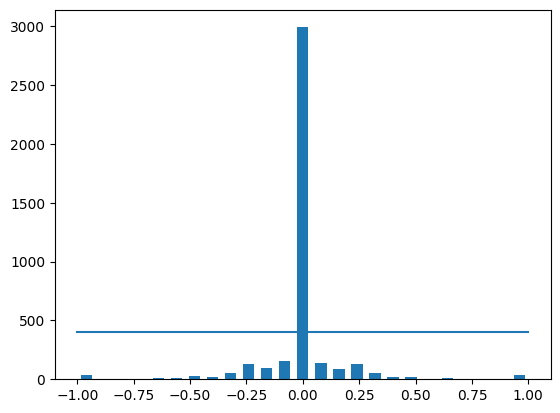

In [19]:
# visualize the data 
num_bins = 25
samples_per_bin = 400
hist, bins = np.histogram(data['steering'], num_bins)
center = (bins[:-1]+ bins[1:]) * 0.5
plt.bar(center, hist, width=0.05)
plt.plot((np.min(data['steering']), np.max(data['steering'])), (samples_per_bin, samples_per_bin))

In [20]:
remove_list = []
for j in range(num_bins):
  list_ = []
  for i in range(len(data['steering'])):
    if data['steering'][i] >= bins[j] and data['steering'][i] <= bins[j+1]:
      list_.append(i)
  list_ = shuffle(list_)
  list_ = list_[samples_per_bin:]
  remove_list.extend(list_)

print('removed:', len(remove_list))
data.drop(data.index[remove_list], inplace=True)
print('remaining:', len(data))

removed: 2590
remaining: 1463


In [21]:
data.shape


(1463, 7)

In [22]:
def load_img_steering(datadir, df):
    imagge_path =[]
    steering =[]
   
    for i in range(len(data)):
       
        indexed_data = data.iloc[i]
        center_img, left_img , right_img =indexed_data[0], indexed_data[1], indexed_data[2]

        # center image  append 
        imagge_path.append(os.path.join(datadir, center_img.strip()))
        steering.append(float(indexed_data[3]))

        # left image  append 
        imagge_path.append(os.path.join(datadir, left_img.strip()))
        steering.append(float(indexed_data[3]+0.15))

         # right image  append 
        imagge_path.append(os.path.join(datadir, right_img.strip()))
        steering.append(float(indexed_data[3]-0.15))

    imagge_path = np.asanyarray(imagge_path)
    steering = np.asanyarray(steering)

    return imagge_path , steering

In [23]:
image_pth, steering = load_img_steering(datadir+"/IMG", data)


len(image_pth)

4389

In [24]:
len(data)

1463

In [25]:
### Train test split
X_train , X_valid , y_train , y_valid =train_test_split(image_pth, steering, test_size=0.2, random_state=2025)

Text(0.5, 1.0, 'Validation set')

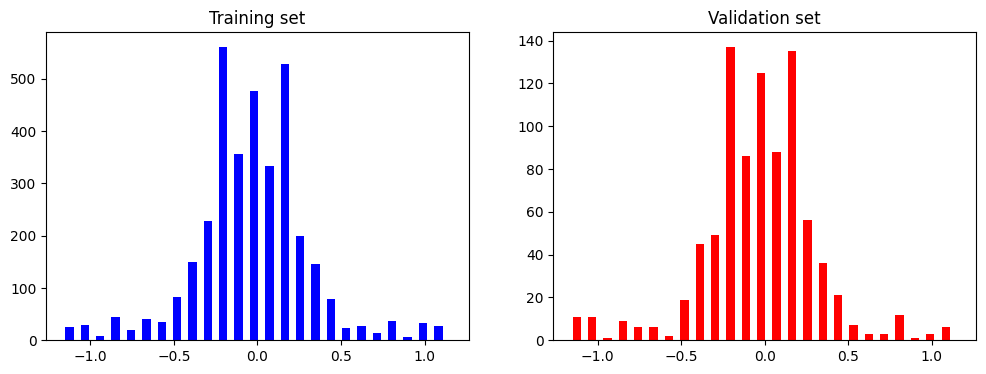

In [26]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
axes[0].hist(y_train, bins=num_bins, width=0.05, color='blue')
axes[0].set_title('Training set')
axes[1].hist(y_valid, bins=num_bins, width=0.05, color='red')
axes[1].set_title('Validation set')

### Data Augmentation

Text(0.5, 1.0, 'Zoomed Image')

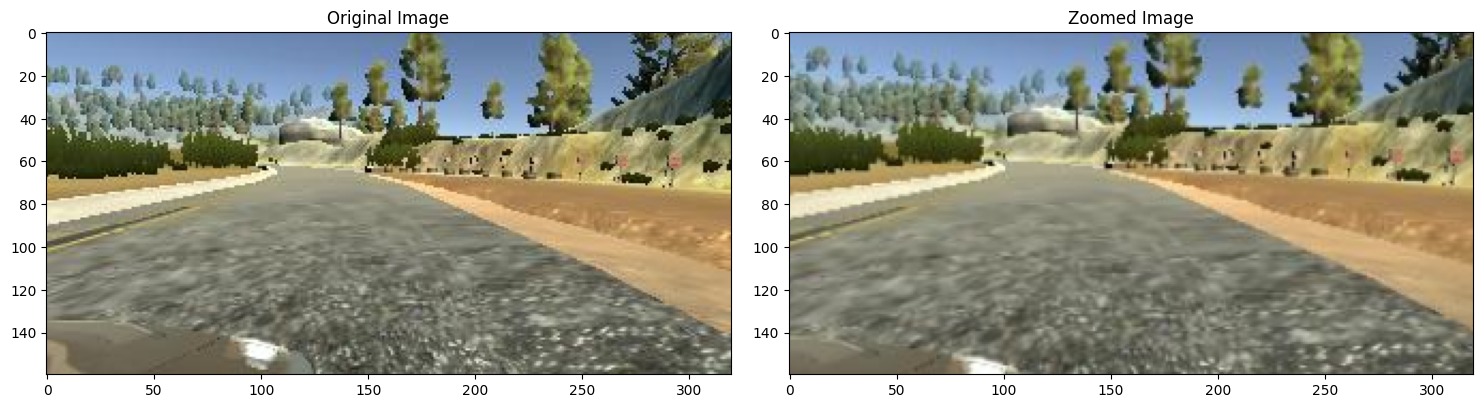

In [27]:
def zoom(image):
  zoom = iaa.Affine(scale=(1, 1.3))
  image = zoom.augment_image(image)
  return image


image = image_pth[random.randint(0, 1000)]
original_image = mpimg.imread(image)
zoomed_image = zoom(original_image)

fig, axs = plt.subplots(1, 2, figsize=(15, 10))
fig.tight_layout()

axs[0].imshow(original_image)
axs[0].set_title('Original Image')

axs[1].imshow(zoomed_image)
axs[1].set_title('Zoomed Image')

Text(0.5, 1.0, 'Panned Image')

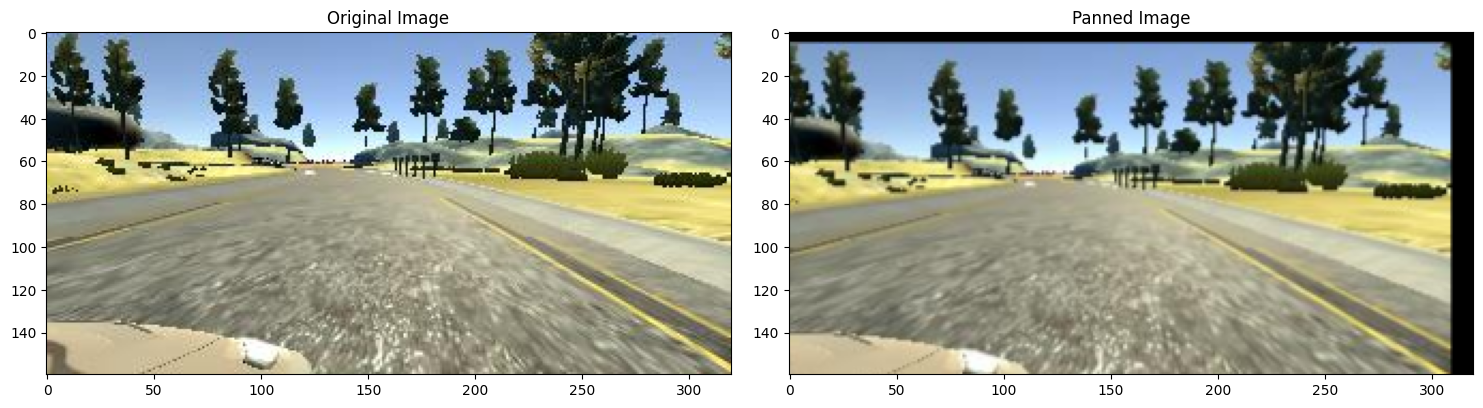

In [28]:
def pan(image):
  pan = iaa.Affine(translate_percent= {"x" : (-0.1, 0.1), "y": (-0.1, 0.1)})
  image = pan.augment_image(image)
  return image


image = image_pth[random.randint(0, 1000)]
original_image = mpimg.imread(image)
panned_image = pan(original_image)

fig, axs = plt.subplots(1, 2, figsize=(15, 10))
fig.tight_layout()

axs[0].imshow(original_image)
axs[0].set_title('Original Image')

axs[1].imshow(panned_image)
axs[1].set_title('Panned Image')

Text(0.5, 1.0, 'Brightness altered image ')

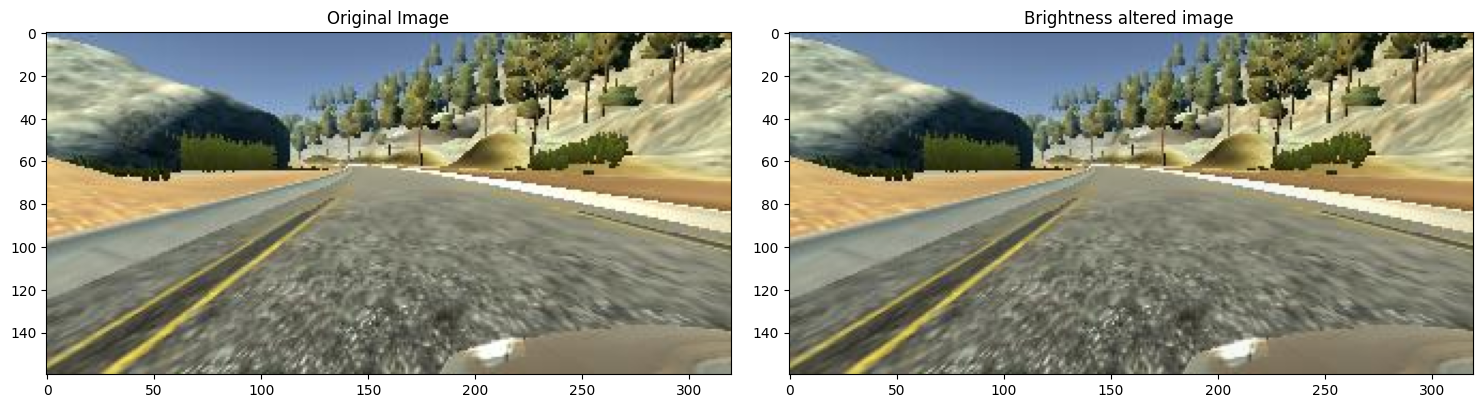

In [29]:
def img_random_brightness(image):
    brightness = iaa.Multiply((0.2, 1.2))
    image = brightness.augment_image(image)
    return image


image = image_pth[random.randint(0, 1000)]
original_image = mpimg.imread(image)
brightness_altered_image = img_random_brightness(original_image)


fig, axs = plt.subplots(1, 2, figsize=(15, 10))
fig.tight_layout()

axs[0].imshow(original_image)
axs[0].set_title('Original Image')

axs[1].imshow(brightness_altered_image)
axs[1].set_title('Brightness altered image ')

Text(0.5, 1.0, 'Flipped Image - Steering Angle:0.148133')

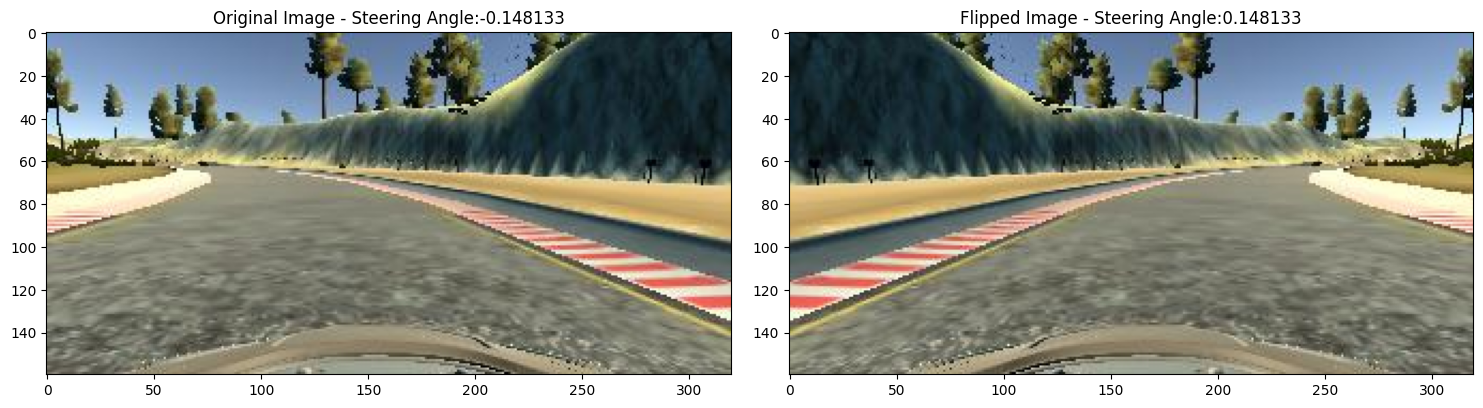

In [30]:
def img_random_flip(image, steering_angle):
    image = cv2.flip(image,1)
    steering_angle = -steering_angle
    return image, steering_angle



random_index = random.randint(0, 100)
image = image_pth[random_index]
steering_angle = steering[random_index]

original_image = mpimg.imread(image)
flipped_image, flipped_steering_angle = img_random_flip(original_image, steering_angle)

fig, axs = plt.subplots(1, 2, figsize=(15, 10))
fig.tight_layout()

axs[0].imshow(original_image)
axs[0].set_title('Original Image - ' + 'Steering Angle:' + str(steering_angle))

axs[1].imshow(flipped_image)
axs[1].set_title('Flipped Image - ' + 'Steering Angle:' + str(flipped_steering_angle))

In [31]:
def random_augment(image, steering_angle):
    image = mpimg.imread(image)
    if np.random.rand()<0.5:
        image = pan(image)
    if np.random.rand()<0.5:
        image = zoom(image)
    if np.random.rand()<0.5:
        image = img_random_brightness(image)
    if np.random.rand()<0.5:
        image, steering_angle = img_random_flip(image, steering_angle)

    return image, steering_angle

IndexError: invalid index to scalar variable.

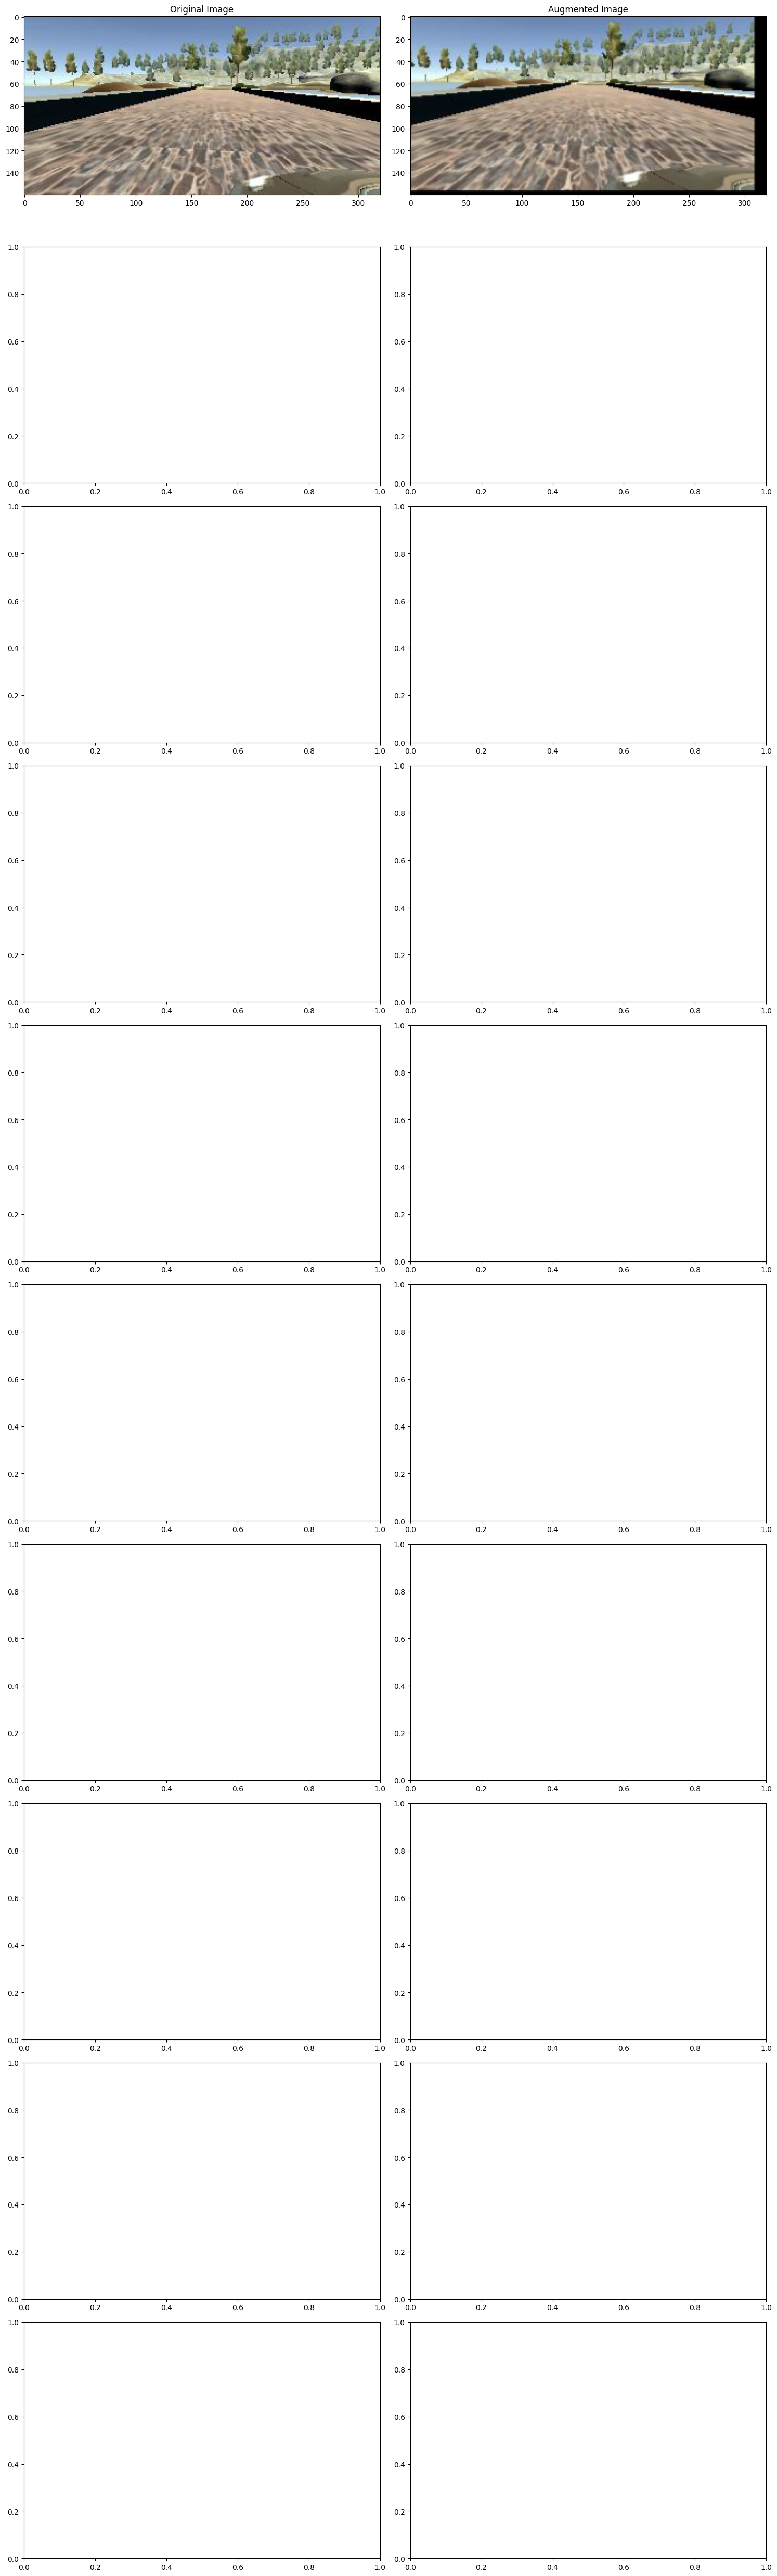

In [32]:
ncol = 2
nrow = 10

fig, axs = plt.subplots(nrow, ncol, figsize=(15, 50))
fig.tight_layout()

for i in range(10):
  randnum = random.randint(0, len(image_pth) - 1)
  random_image = image_pth[randnum]
  random_steering = steering[randnum]

  original_image = mpimg.imread(random_image)
  augmented_image, steering = random_augment(random_image, random_steering)

  axs[i][0].imshow(original_image)
  axs[i][0].set_title("Original Image")

  axs[i][1].imshow(augmented_image)
  axs[i][1].set_title("Augmented Image")

In [33]:
def img_preprocess(img):
    img = img[60:135,:,:]
    img = cv2.cvtColor(img, cv2.COLOR_RGB2YUV)
    img = cv2.GaussianBlur(img,  (3, 3), 0)
    img = cv2.resize(img, (200, 66))
    img = img/255
    return img

Text(0.5, 1.0, 'Preprocessed Image')

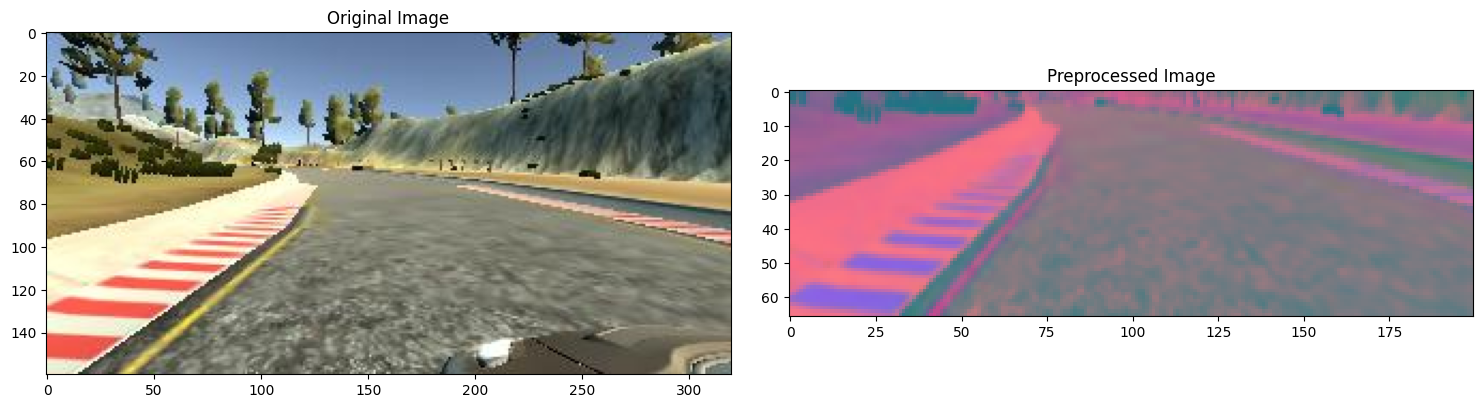

In [34]:
image = image_pth[100]
original_image = mpimg.imread(image)
preprocessed_image = img_preprocess(original_image)

fig, axs = plt.subplots(1, 2, figsize=(15, 10))
fig.tight_layout()
axs[0].imshow(original_image)
axs[0].set_title('Original Image')
axs[1].imshow(preprocessed_image)
axs[1].set_title('Preprocessed Image')

In [35]:
def batch_generator(image_paths, steering_ang, batch_size, istraining):

  while True:
    batch_img = []
    batch_steering = []

    for i in range(batch_size):
      random_index = random.randint(0, len(image_paths) - 1)

      if istraining:
        im, steering = random_augment(image_paths[random_index], steering_ang[random_index])

      else:
        im = mpimg.imread(image_paths[random_index])
        steering = steering_ang[random_index]

      im = img_preprocess(im)
      batch_img.append(im)
      batch_steering.append(steering)
    yield (np.asarray(batch_img), np.asarray(batch_steering))


In [36]:
x_train_gen, y_train_gen = next(batch_generator(X_train, y_train, 1, 1))
x_valid_gen, y_valid_gen = next(batch_generator(X_valid, y_valid, 1, 0))

Text(0.5, 1.0, 'Validation Image')

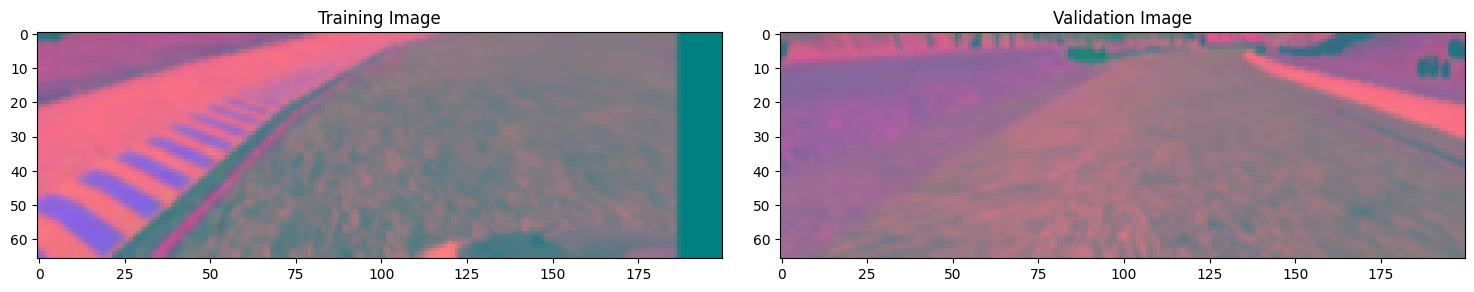

In [37]:
fig, axs = plt.subplots(1, 2, figsize=(15, 10))
fig.tight_layout()

axs[0].imshow(x_train_gen[0])
axs[0].set_title('Training Image')

axs[1].imshow(x_valid_gen[0])
axs[1].set_title('Validation Image')

In [38]:
x_train_gen.shape

(1, 66, 200, 3)

In [ ]:
from keras.models import Sequential
from keras.layers import Convolution2D , MaxPooling2D, Dropout, Flatten, Dense, Conv2D


def nvidia_model():
    model= Sequential()

    model.add(Conv2D(24,(5,5), strides=(2,2), input_shape=(66,200,3), activation='elu' ))

    model.add(Conv2D(36, (5,5), strides=(2,2), activation='elu'))

    model.add(Conv2D(48, (5,5), strides=(2,2), activation='elu'))

    model.add(Conv2D(64, (5,5), activation='elu'))

    model.add(Flatten())

    model.add(Dense(100, activation='elu'))

    model.add(Dense(50, activation='elu'))

    model.add(Dense(10, activation='elu'))

    model.add(Dense(11))


    optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
    model.compile(loss='mse', optimizer=optimizer)

    return model
